In [1]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
%pylab inline
import random as rd
import time
from IPython import display


Populating the interactive namespace from numpy and matplotlib


In [9]:
def rz(theta):
    return [[np.exp(-1j * theta / 2), 0],[0, np.exp(1j * theta / 2)]]
def rx (theta):
    return [[np.cos(theta / 2), -1j * np.sin(theta / 2)],
                     [-1j * np.sin(theta / 2), np.cos(theta / 2)]]


#Defining time scales
total_time = 1.0
steps = 100


#Defining H0

H0 = np.zeros([2,2])
       

#Defining Forbidden sates

#states_forbidden_list = []

#Defining Concerned states (starting states)
psi0 = [0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1]
states_draw_names = ['g','e']

#Defining U (Target)

theta, phi = np.random.rand(2)
U = np.dot(rz(phi),rx(theta))



#Defining U0 (Initial)
q_identity = np.identity(2)
U0= q_identity

#Defining control Hs
Q_x   = np.diag(np.sqrt(np.arange(1,2)),1)+np.diag(np.sqrt(np.arange(1,2)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,2)),1)-np.diag(np.sqrt(np.arange(1,2)),-1))
Q_z   = np.diag(np.arange(0,2))

Hops = [Q_x,Q_y,Q_z]
ops_max_amp = [4.0,4.0, 2*np.pi*2.0]
Hnames =['x','y', 'z']
H_time_scales = {'0':0.05, '1': 0.12}

#Defining convergence parameters
max_iterations = 150
decay = max_iterations/2
convergence = {'rate':0.005, 'update_step':50, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0.01, 'z':0.01, 'dwdt':0.01,'d2wdt2':0.001*0.0001, 'inter':100}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}
print U

[[ 0.91970393-0.07524145j -0.03141952-0.38405238j]
 [ 0.03141952-0.38405238j  0.91970393+0.07524145j]]


([array([ 0.30241382,  0.3784661 ,  0.41458321,  0.42824683,  0.43618295,
          0.43037403,  0.4030261 ,  0.36994049,  0.35758355,  0.38360414,
          0.42200729,  0.45327044,  0.4697772 ,  0.47232884,  0.45476496,
          0.42307797,  0.39848369,  0.39635271,  0.39892459,  0.37971807,
          0.34013703], dtype=float32),
  array([-0.36320296, -0.40498719, -0.3478719 , -0.21636945, -0.04743513,
          0.12829666,  0.27639025,  0.35707822,  0.3492355 ], dtype=float32),
  array([ 0.07125226, -0.1479589 , -0.09202468,  0.10438731,  0.00849155,
          0.0912189 ,  0.09195478, -0.12433548,  0.05037966,  0.02394112,
          0.18698485,  0.10776954,  0.22265041, -0.04952486,  0.15321495,
          0.04914763,  0.02245708, -0.01525482, -0.19489436,  0.12451147,
         -0.17342165, -0.2319589 , -0.03773982, -0.00901711,  0.13456051,
         -0.0496517 ,  0.11808822, -0.18421862, -0.22194059, -0.14227581,
         -0.02196933, -0.07792766,  0.13555704, -0.18020585, -0.09478

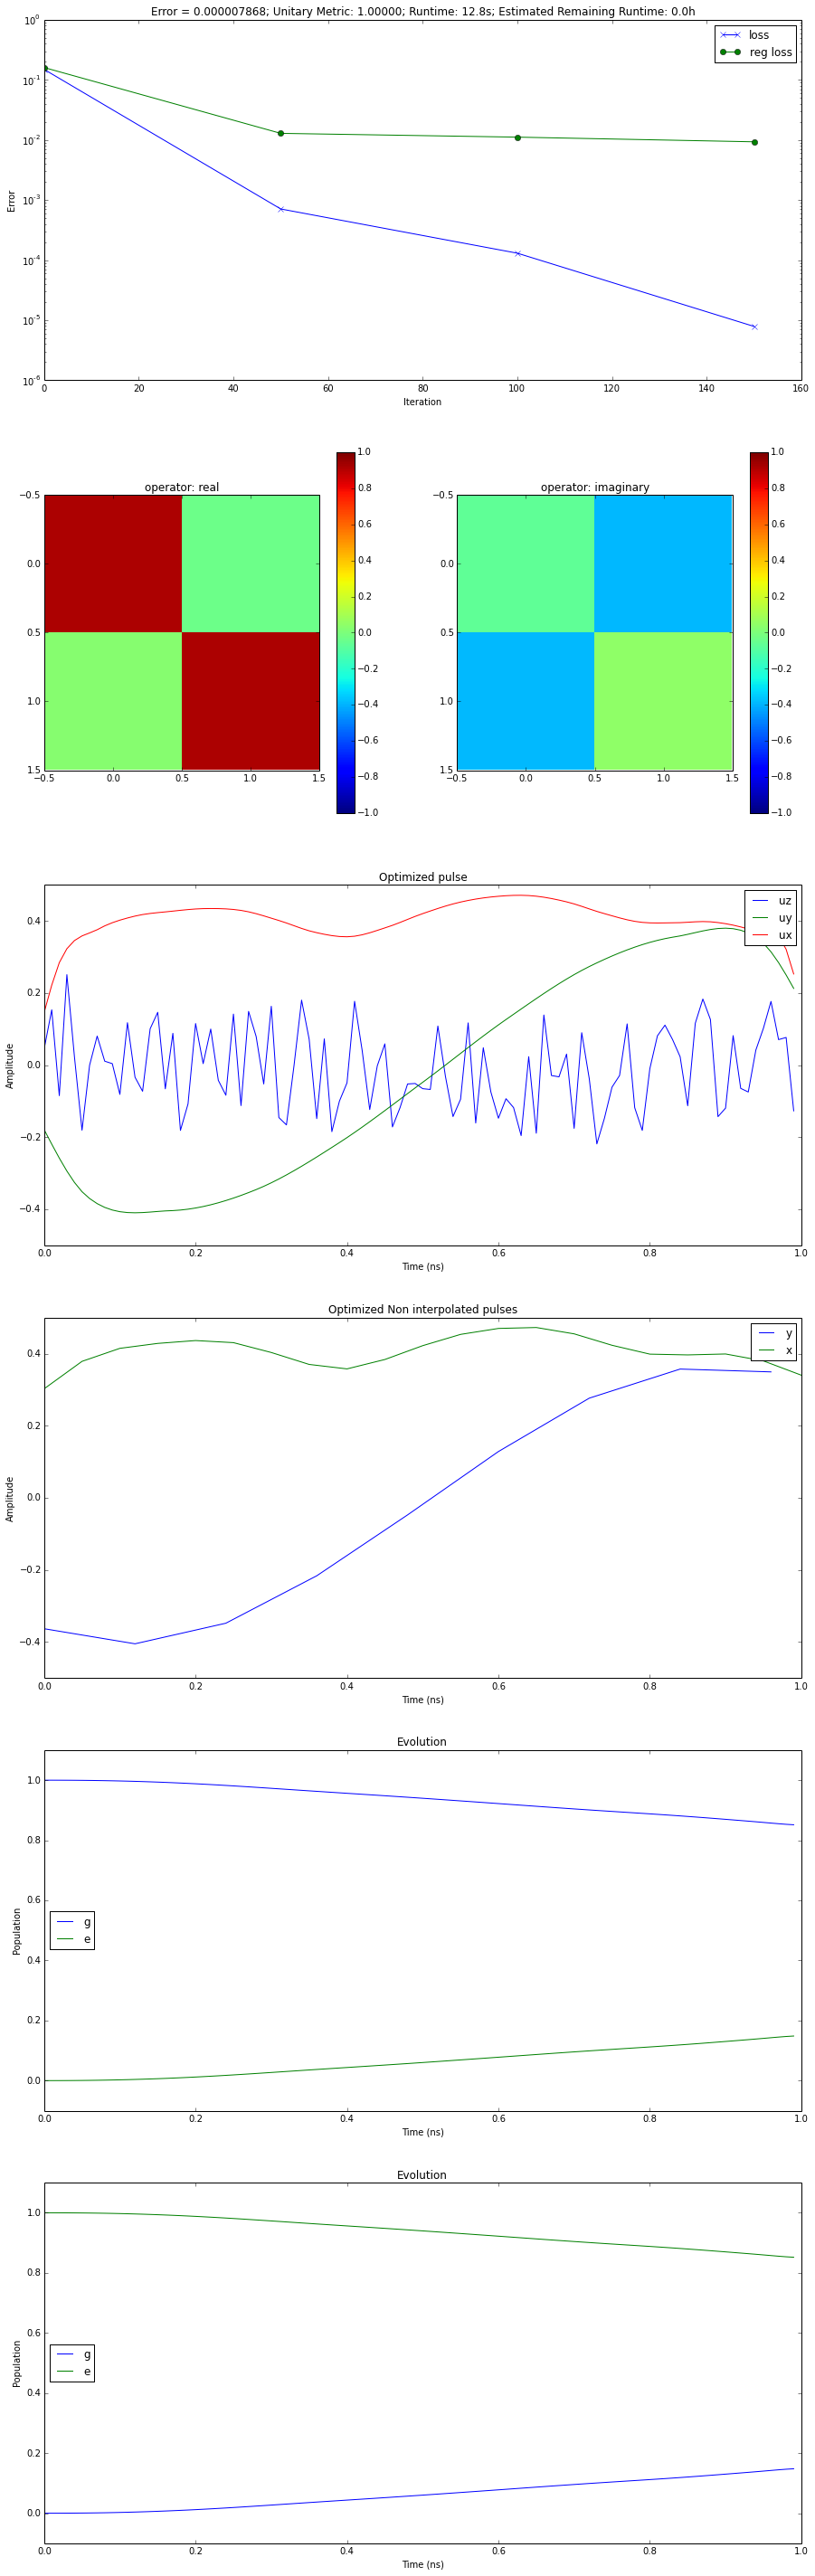

In [10]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True

Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence, draw = [states_draw_list,states_draw_names] ,\
      maxA = ops_max_amp, use_gpu=True, H_time_scales = H_time_scales)